# All Players Bowling Stats

### This is a notebook exploring the bowling statistics of GCCC players in 2024

In [10]:
# Importing data analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Reading in the dataframe using pandas
df = pd.read_csv("All players bowling 2024.csv", index_col="Rank")
df

,Player,OVERS,MAIDENS,RUNS,WICKETS,BEST BOWLING,5 WICKET HAUL,ECONOMY RATE,STRIKE RATE,AVERAGE
Rank,,,,,,,,,,
1,Rob Firth,104.3,20,378,36,6/24,3,3.62,17.42,10.50
2,Paul Davis,100.2,16,338,33,5/6,2,3.37,18.24,10.24
3,Tommy Howton,112.5,25,334,33,6/9,1,2.96,20.52,10.12
4,Arunkumar Sathiamoorthy,163.1,23,633,32,5/20,1,3.88,30.59,19.78
5,Lucas Maidstone,85.1,5,382,22,5/18,1,4.49,23.23,17.36
6,shahrokh navaee,56.2,10,177,16,5/20,1,3.14,21.13,11.06
7,Alexander Priest,68.0,6,389,15,3/24,0,5.72,27.20,25.93
8,Euan West,48.2,3,264,12,3/7,0,5.46,24.17,22.00
9,Daniel Cadd,78.2,9,340,12,2/1,0,4.34,39.17,28.33


In [3]:
# Identifying data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1 to 28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         28 non-null     object 
 1   OVERS          28 non-null     float64
 2   MAIDENS        28 non-null     int64  
 3   RUNS           28 non-null     int64  
 4   WICKETS        28 non-null     int64  
 5   BEST BOWLING   28 non-null     object 
 6   5 WICKET HAUL  28 non-null     int64  
 7   ECONOMY RATE   28 non-null     float64
 8   STRIKE RATE    28 non-null     float64
 9   AVERAGE        28 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.4+ KB


In [4]:
# Identifying the shape of the dataframe
df.shape

(28, 10)

In [5]:
# Extracting stats from numerical columns
df.describe()

,OVERS,MAIDENS,RUNS,WICKETS,5 WICKET HAUL,ECONOMY RATE,STRIKE RATE,AVERAGE
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,45.478571,5.892857,194.178571,11.392857,0.392857,4.407500,24.965000,18.585357
std,38.599140,6.924670,148.451527,10.231901,0.737327,1.356754,8.277947,8.136298
min,7.300000,0.000000,22.000000,3.000000,0.000000,2.440000,11.250000,5.500000
25%,19.375000,1.000000,72.750000,4.750000,0.000000,3.312500,18.660000,11.465000
50%,28.000000,3.000000,160.500000,7.000000,0.000000,4.525000,25.285000,19.055000
75%,62.225000,6.500000,310.000000,12.750000,1.000000,5.285000,29.270000,25.000000
max,163.100000,25.000000,633.000000,36.000000,3.000000,8.850000,43.500000,37.330000


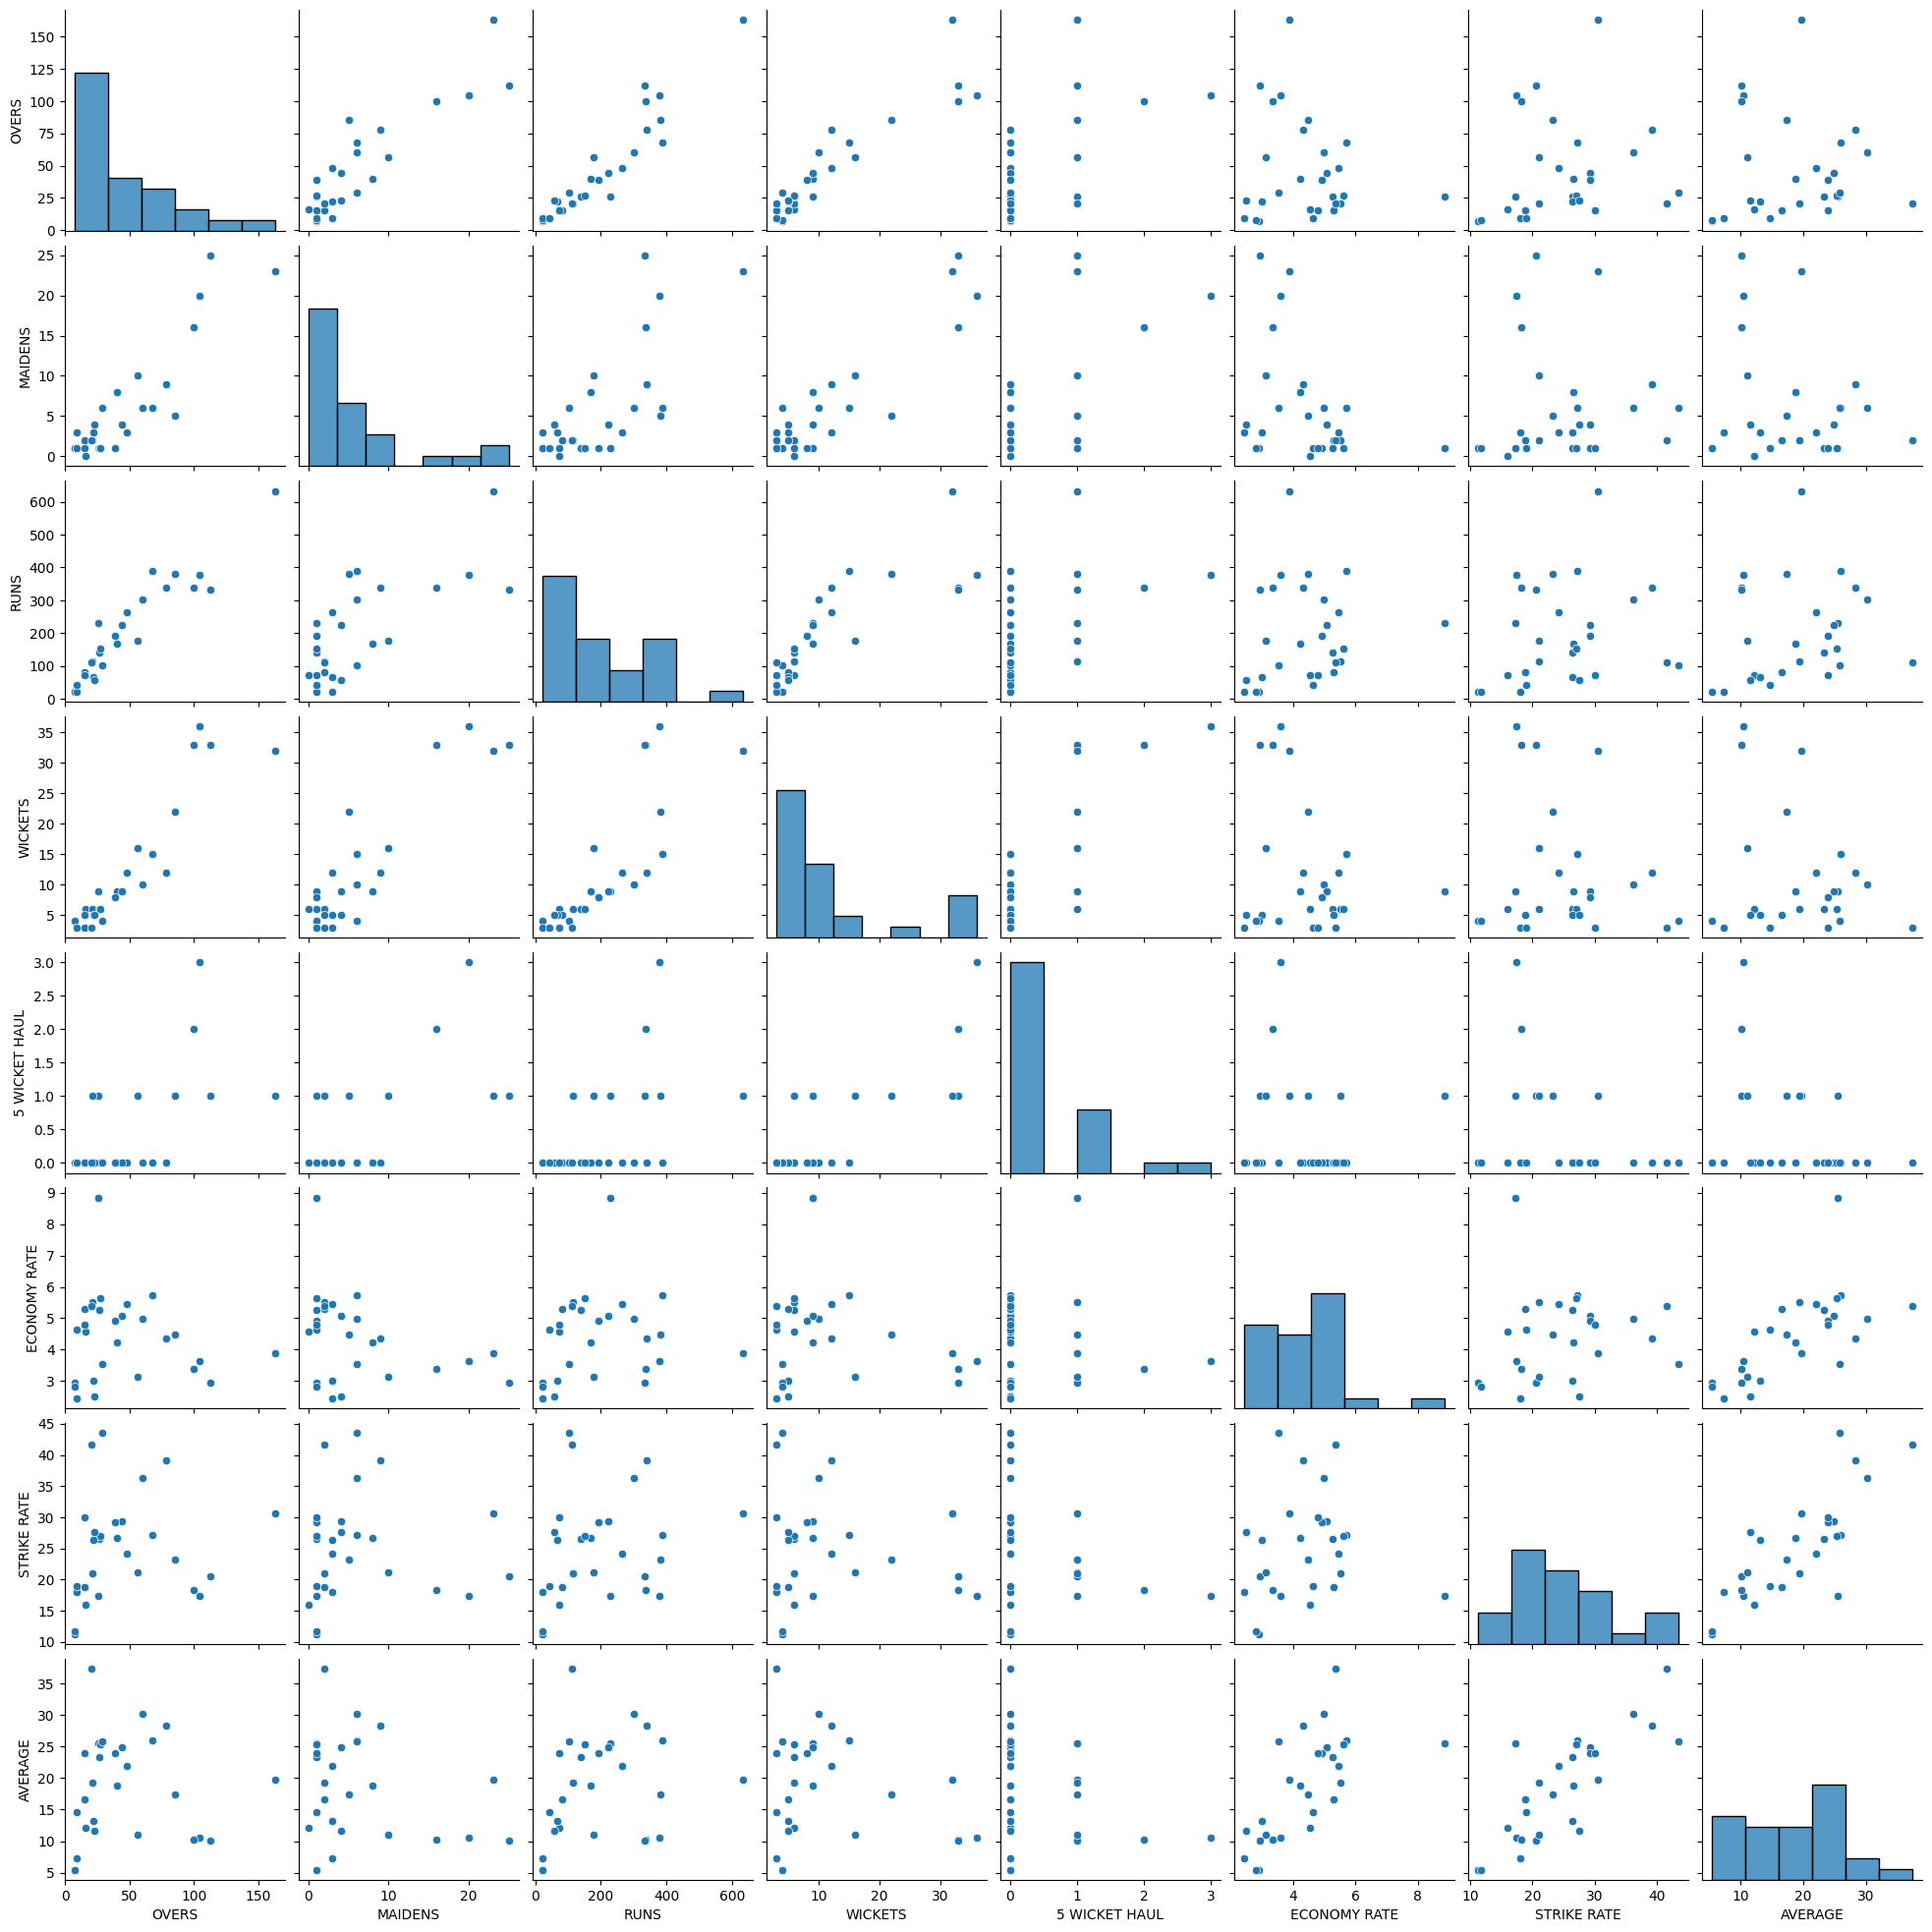

In [6]:
# Creating a pairplot
numeric_df = df.drop('Player', axis=1)
numeric_df = numeric_df.drop('BEST BOWLING', axis=1)
sns.pairplot(numeric_df)

<Axes: >

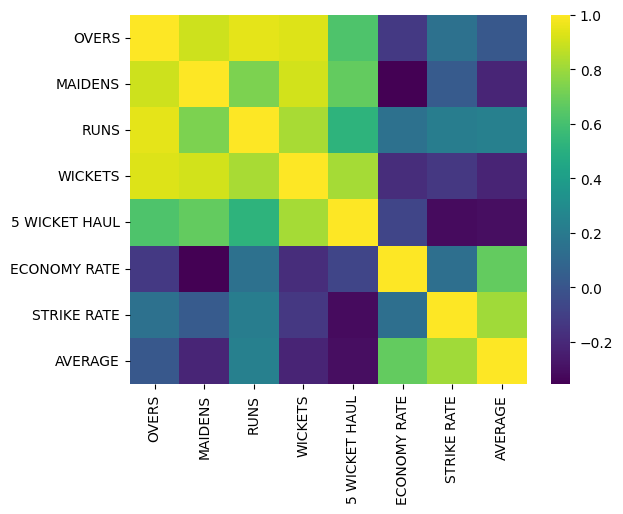

In [7]:
# Plotting a heatmap to show correlation
correlation = numeric_df.corr()
sns.heatmap(correlation, cmap="viridis")

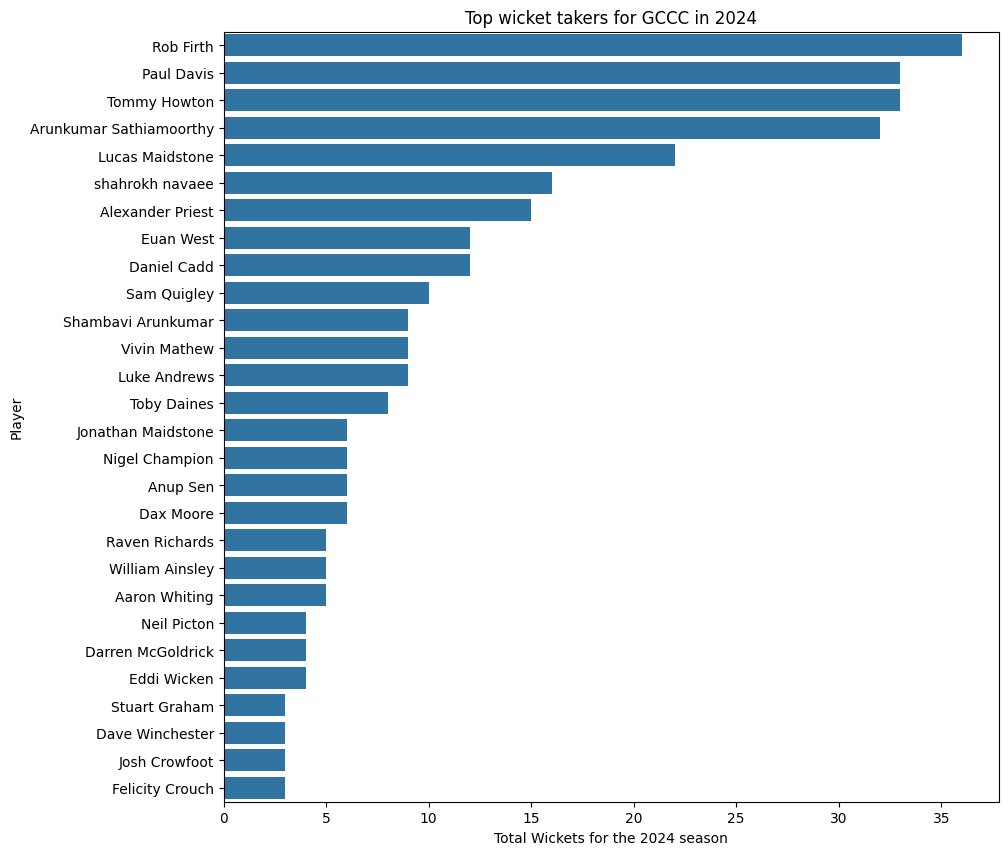

In [8]:
# Creating barplot to show wickets of each player
fig = plt.figure(figsize=(10, 10))
sns.barplot(y=df['Player'], x=df['WICKETS'], data=df)
plt.xlabel('Total Wickets for the 2024 season')
plt.title('Top wicket takers for GCCC in 2024')
plt.show()

<Axes: xlabel='OVERS', ylabel='ECONOMY RATE'>

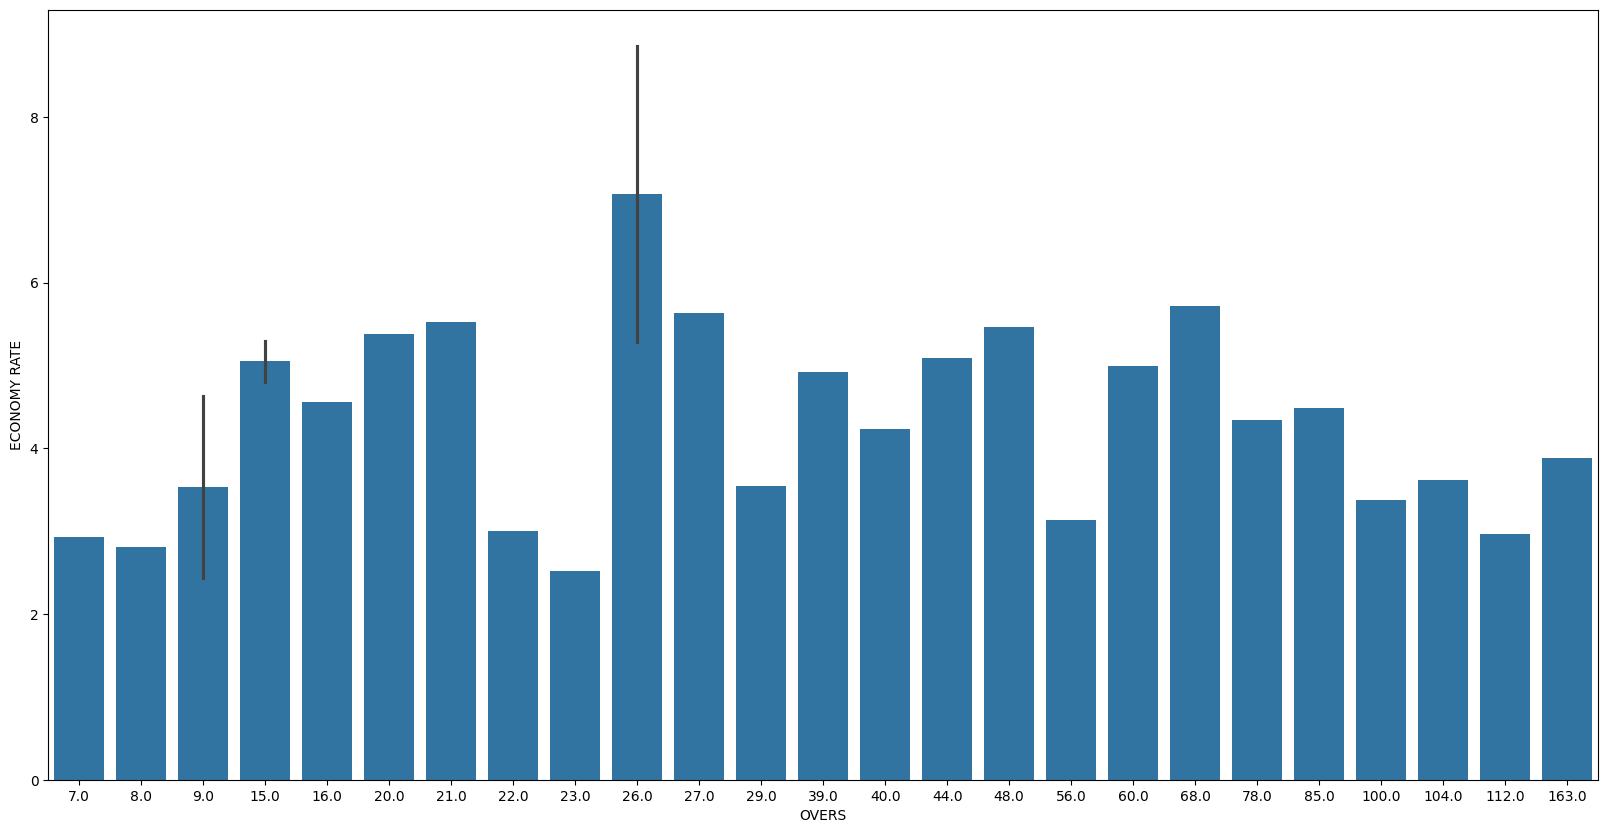

In [9]:
# How number of overs affects economy rate
df_played = df.groupby("OVERS")
df["OVERS"] = df["OVERS"].round(0)
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df, x=df["OVERS"], y=df["ECONOMY RATE"])

In [11]:
# Create X and y independent and dependent variables
X = numeric_df.drop('WICKETS')
y = numeric_df['WICKETS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier and train it with the data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

KeyError: "['WICKETS'] not found in axis"